Ejemplo 2: Ahora suponga que desea calcular la probabilidad de jugar futbol cuando el clima está nublado y la temperatura es templada.

Características (entradas del modelo): clima, temperatura
Variable objetivo/ clase: jugar(0-No , 1-si)

In [22]:
#libreria para calculos matematicos
import numpy as np
#libreria para manejo de datos
import pandas as pd
#libreria para manejo de graficos 
import matplotlib.pyplot as plt
#libreria para el proprocesamiento de los datos
from sklearn import preprocessing
#libreria para naive bayes
from sklearn.naive_bayes import GaussianNB

#libreria para separar los datos 
from sklearn.model_selection import train_test_split
#libreria para el accuracy
from sklearn.metrics import accuracy_score

#leer arachivo plano y cargarlos en dataframe
data = pd.read_csv('./data_set/exercise1.csv',sep=';')
data.head()

,clima,temperatura,jugar
0,soleado,caliente,no
1,soleado,caliente,si
2,nublado,caliente,si
3,lluvioso,templado,si
4,luvioso,frio,no


In [23]:
#preprocesamiento en este caso pasar de cadena a valores discretos (0,1,2)

le = preprocessing.LabelEncoder()
data['clima_le'] = le.fit_transform(data['clima'])
data['temperatura_le'] = le.fit_transform(data['temperatura'])
data['jugar_le'] = le.fit_transform(data['jugar'])
data.head()


,clima,temperatura,jugar,clima_le,temperatura_le,jugar_le
0,soleado,caliente,no,3,0,0
1,soleado,caliente,si,3,0,1
2,nublado,caliente,si,2,0,1
3,lluvioso,templado,si,0,2,1
4,luvioso,frio,no,1,1,0


In [24]:
#vemos las estadisticas del data frame
data.describe()

,clima_le,temperatura_le,jugar_le
count,14.000000,14.000000,14.000000
mean,1.714286,1.142857,0.642857
std,1.266647,0.864438,0.497245
min,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.000000
50%,2.000000,1.000000,1.000000
75%,3.000000,2.000000,1.000000
max,3.000000,2.000000,1.000000


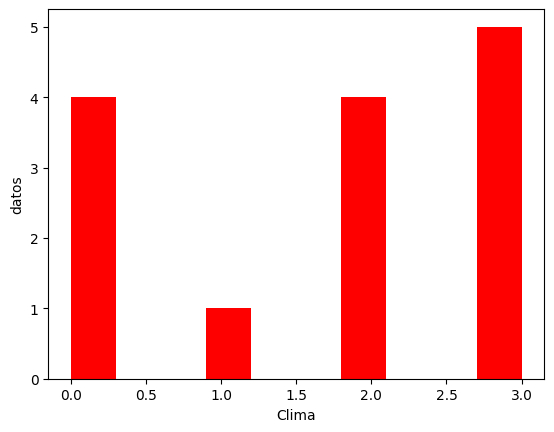

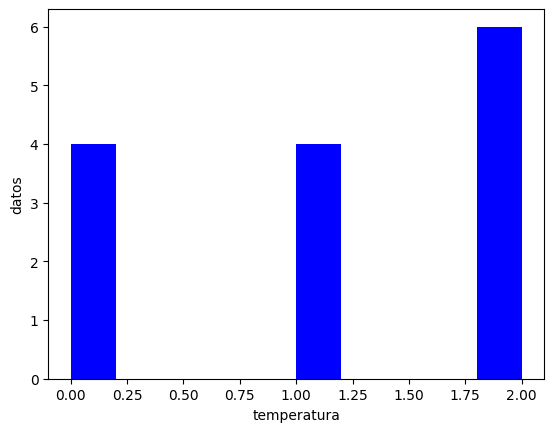

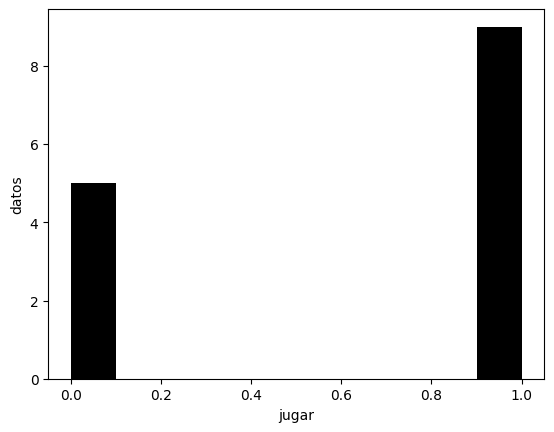

In [25]:
#podemos graficar 

plt.hist(data['clima_le'], color='red')
plt.xlabel('Clima')
plt.ylabel('datos')
plt.show()

plt.hist(data['temperatura_le'], color='blue')
plt.xlabel('temperatura')
plt.ylabel('datos')
plt.show()

plt.hist(data['jugar_le'], color='black')
plt.xlabel('jugar')
plt.ylabel('datos')
plt.show()

In [26]:
#creamos el modelo de prediccion Naive Bayes

#definir las caracteristicas 
features = ['clima_le','temperatura_le']
x = data[features].values
# definir la variable objetivo / clase
y = data['jugar_le']

# se entrena el modelo
nb = GaussianNB()
nb.fit(x,y)

# se hace la prediccion
prediction = nb.predict([[1,2]])

print(prediction)


[1]


In [27]:
## separacion de los datos 70 - 30 

#definir las caracteristicas 
features = ['clima_le','temperatura_le']
x = data[features].values
# definir la variable objetivo / clase
y = data['jugar_le']

#separo datos
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.7)


In [28]:
### se realiza la prediccion y se imprime el valor de la metrica accuracy

#se crea el modelo
nb =  GaussianNB()
# se entrena el modelo
nb.fit(x_train,y_train)
# se genera la prediccion
prediction = nb.predict(x_test)
# se imprime el valor de metrica accuracy 
print('Accuracy = ', accuracy_score(y_test,prediction))

Accuracy =  0.2
